In [206]:
from pprint import pprint
from pathlib import Path
import requests
import pandas as pd
import csv

In [207]:
# read in the stocks data .csv
stockcsv = Path('../data/raw_data/corn_stocks_seasonal.csv')

stockdata_df = pd.read_csv(stockcsv, delimiter=',')

In [208]:
stockdata_df.columns

Index(['Program', 'Year', 'Period', 'Week Ending', 'Geo Level', 'State',
       'State ANSI', 'Ag District', 'Ag District Code', 'County',
       'County ANSI', 'Zip Code', 'Region', 'watershed_code', 'Watershed',
       'Commodity', 'Data Item', 'Domain', 'Domain Category', 'Value',
       'CV (%)'],
      dtype='object')

In [209]:
# convert 'FIRST OF MON' to a month and replace it in stockdata_df
months_dict = {'FIRST OF DEC' : 'december', 'FIRST OF MAR' : 'march', 'FIRST OF JUN' : 'june', 'FIRST OF SEP' : 'september'}

stockmonth = stockdata_df['Period']

for month in stockmonth:
    if month not in list(months_dict):
        continue
    else:    
        newmonth = months_dict[month]
        stockdata_df.replace({month : newmonth}, inplace=True)

In [210]:
# drop empty columns
stockdata_df.describe()

,Year,Week Ending,State ANSI,Ag District,Ag District Code,County,County ANSI,Zip Code,Region,watershed_code,Watershed,CV (%)
count,83.000000,0.0,83.0,0.0,0.0,0.0,0.0,0.0,0.0,83.0,0.0,0.0
mean,2009.879518,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
std,6.027169,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
min,2000.000000,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
25%,2005.000000,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
50%,2010.000000,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
75%,2015.000000,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
max,2020.000000,NaN,31.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN


In [211]:
stockdata_df.drop(columns=['Week Ending', 'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code','Region', 'watershed_code', 'Watershed', 'CV (%)'], inplace=True)

In [213]:
# convert 'Values' into and int
for value in stockdata_df['Value']:
    newtype = value.split()
    rmv = format(float(newtype[0].replace(',', '')), '0.0f')
    stockdata_df.replace({value : rmv}, inplace=True)

stockdata_df

,Program,Year,Period,Geo Level,State,State ANSI,Commodity,Data Item,Domain,Domain Category,Value
0,SURVEY,2020,march,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,993613000
1,SURVEY,2020,june,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,571963000
2,SURVEY,2020,september,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,238918000
3,SURVEY,2019,march,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,1006439000
4,SURVEY,2019,june,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,571797000
...,...,...,...,...,...,...,...,...,...,...,...
78,SURVEY,2001,december,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,1040485000
79,SURVEY,2000,march,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,689660000
80,SURVEY,2000,june,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,437336000
81,SURVEY,2000,september,STATE,NEBRASKA,31,CORN,"CORN, GRAIN - STOCKS, MEASURED IN BU",TOTAL,NOT SPECIFIED,230059000


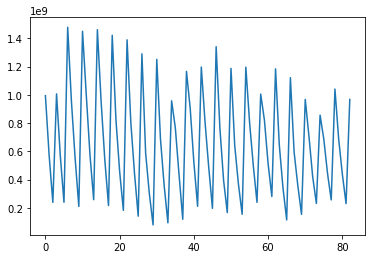

In [205]:
# calculate the EWMA
window = 1


ewma = stockdata_df['Value'].ewm(span=window).mean()
ewma.plot()